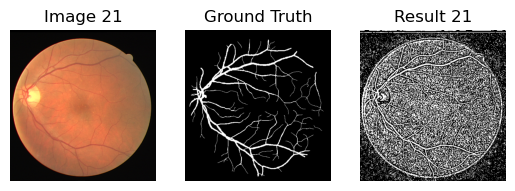

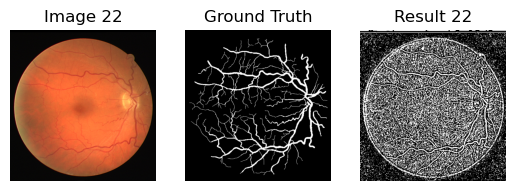

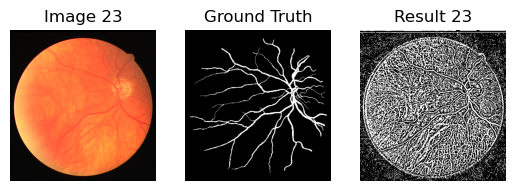

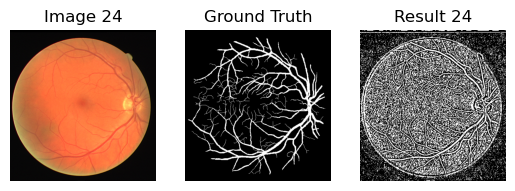

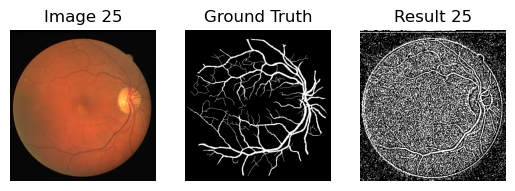

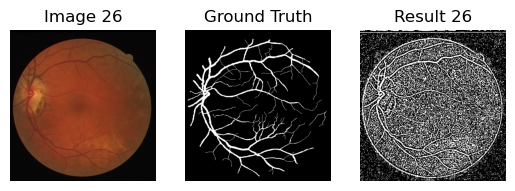

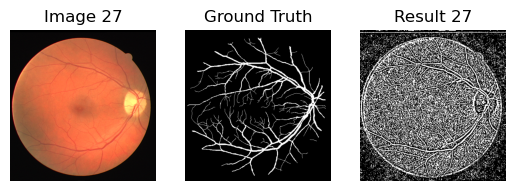

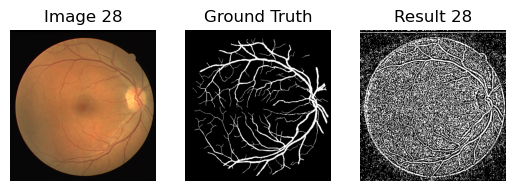

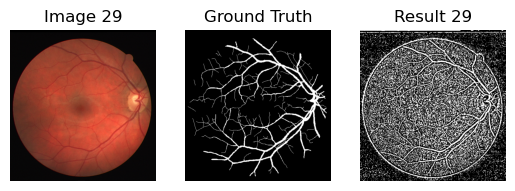

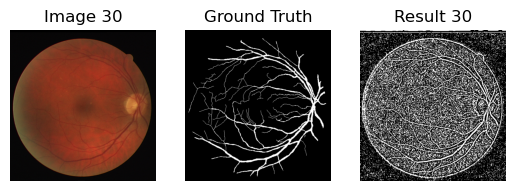

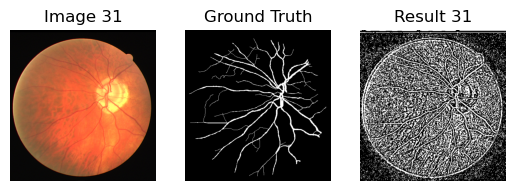

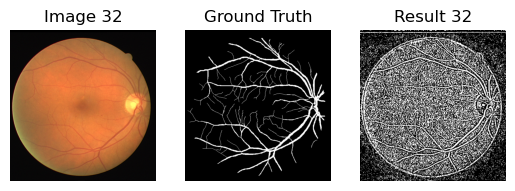

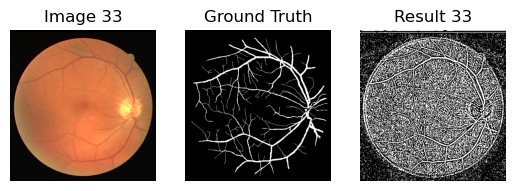

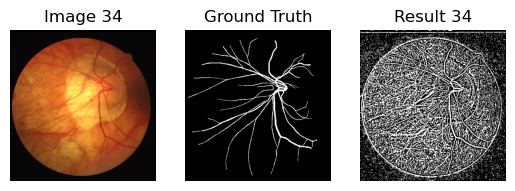

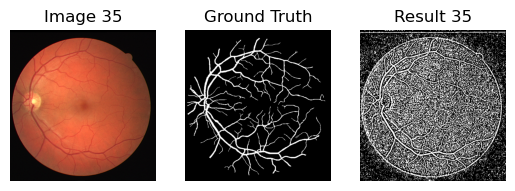

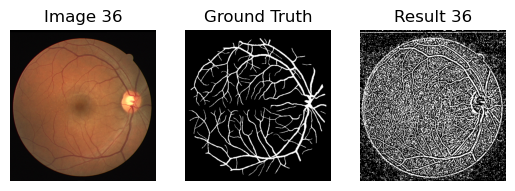

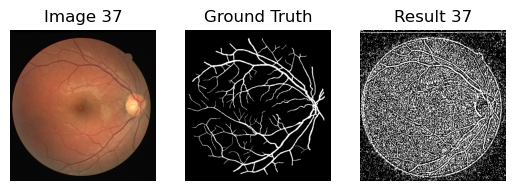

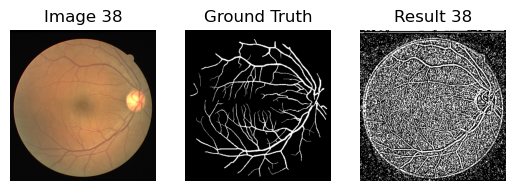

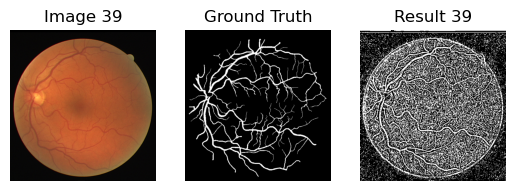

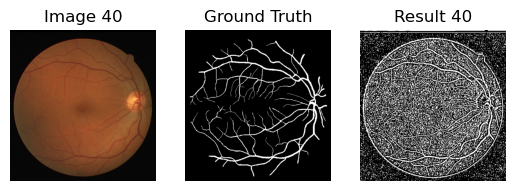

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def MF_FDOG(image, s, theta):
    size = 10
    if size % 2 == 0:
        size += 1
    f = np.arange(-size//2 + 1., size//2 + 1.)
    g = (1 / np.sqrt(2 * np.pi) * s) * np.exp(-(f ** 2 / (2. * s ** 2)))
    g /= np.sum(g)

    kernel = np.outer(g, g)
    rotated_kernel = cv2.getRotationMatrix2D((size // 2, size // 2), theta, 1)
    kernel = cv2.warpAffine(kernel, rotated_kernel, (size, size))

    filtered_image = cv2.filter2D(image, -1, kernel)

    return filtered_image

def vessel_extraction(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    directions = [0, 45, 90, 135, 180, 225, 270, 315]
    sigma =1.5

    result = np.zeros_like(image)
    for direction in directions:
        filtered_image = MF_FDOG(image, sigma, direction)
        result += np.abs(image - filtered_image)

    # Enhance vessel visibility
    result = cv2.normalize(result, None, 0, 255, cv2.NORM_MINMAX)
    result = np.uint8(result)

    # Apply thresholding
    binary_result = cv2.adaptiveThreshold(result,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11, 1)

    # Apply morphological opening to remove small isolated regions
    kernel_open = np.ones((2, ), np.uint8)
    binary_result = cv2.morphologyEx(binary_result, cv2.MORPH_OPEN, kernel_open)

    # Apply morphological closing to remove small noise
    kernel_close = np.ones((2, 2), np.uint8)
    binary_result = cv2.morphologyEx(binary_result, cv2.MORPH_CLOSE, kernel_close)


    
    

    return binary_result


for i in range(21, 41):

    image_path = 'images/{}_training.tif'.format(i)
    image = cv2.imread(image_path)
    
    result = vessel_extraction(image)
    
    expected_path = 'ground_truth/{}_training.png'.format(i)
    expected = cv2.imread(expected_path)


    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Image {}'.format(i))
    plt.axis('off')
    
    # Expected Result
    plt.subplot(1, 3, 2)
    plt.imshow(expected, cmap='gray')
    plt.title('Ground Truth')
    plt.axis('off')

    # Vessel Extraction Result
    plt.subplot(1, 3, 3)
    plt.imshow(result, cmap='gray')
    plt.title('Result {}'.format(i))
    plt.axis('off')
    
    
    
    plt.show()




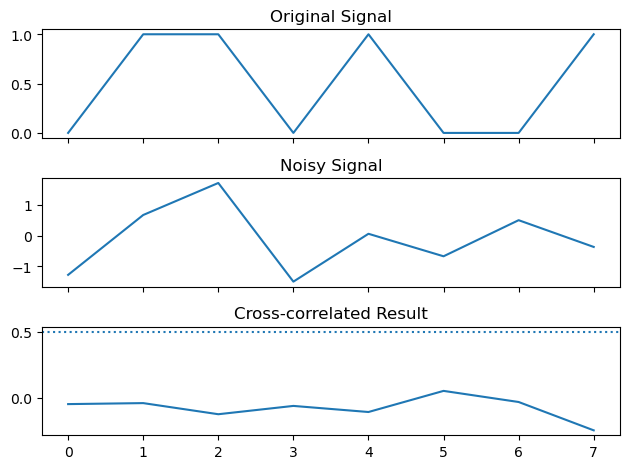